In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [28]:
path = "/Users/muhammadhussain/Desktop/Data/Haier/809169_temp.parquet"

In [33]:
df = pd.read_parquet(path)
df

,Datetime,RTD,1st Suc.,1st Disc.,2nd Disc.,2nd Evap. In,2nd Evap. Out,Cond. Air In,H.E.,Ambient,Mains Voltage,Event
index,,,,,,,,,,,,
0,2022-03-24 09:24:53,20.700001,20,20,20,20,20,21,21,21,241,None
1,2022-03-24 09:24:54,20.400000,20,20,20,20,20,20,21,20,231,"["" Door opening"","" Door closing""]"
2,2022-03-24 09:30:34,19.700001,-38,-40,13,21,21,29,-35,22,235,None
3,2022-03-24 09:30:54,19.500000,-36,-39,14,22,22,30,-35,21,228,None
4,2022-03-24 09:36:54,19.500000,-34,-36,-33,21,22,30,-40,22,223,None
...,...,...,...,...,...,...,...,...,...,...,...,...
88577,2023-03-28 10:55:39,-81.000000,-12,-25,-26,-83,-84,24,-26,27,230,None
88578,2023-03-28 11:01:39,-79.500000,-29,-31,-30,-82,-82,31,-32,26,225,None
88579,2023-03-28 11:07:39,-78.500000,-27,-29,-28,-82,-83,32,-29,26,225,None


In [32]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normaliser de numeriske kolonner
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[numerical_cols])

# Lav en ny DataFrame for den normaliserede version
df_normalized = df.copy()  # Kopiér den originale DataFrame
df_normalized[numerical_cols] = normalized_data

# Udskriv det normaliserede DataFrame for at se forskellen
df_normalized

,Datetime,RTD,1st Suc.,1st Disc.,2nd Disc.,2nd Evap. In,2nd Evap. Out,Cond. Air In,H.E.,Ambient,Mains Voltage,Event
index,,,,,,,,,,,,
0,2022-03-24 09:24:53,59.527898,20,20,20,20,20,21,21,21,241,None
1,2022-03-24 09:24:54,59.349838,20,20,20,20,20,20,21,20,231,"["" Door opening"","" Door closing""]"
2,2022-03-24 09:30:34,58.934368,-38,-40,13,21,21,29,-35,22,235,None
3,2022-03-24 09:30:54,58.815661,-36,-39,14,22,22,30,-35,21,228,None
4,2022-03-24 09:36:54,58.815661,-34,-36,-33,21,22,30,-40,22,223,None
...,...,...,...,...,...,...,...,...,...,...,...,...
88577,2023-03-28 10:55:39,-0.834126,-12,-25,-26,-83,-84,24,-26,27,230,None
88578,2023-03-28 11:01:39,0.056170,-29,-31,-30,-82,-82,31,-32,26,225,None
88579,2023-03-28 11:07:39,0.649700,-27,-29,-28,-82,-83,32,-29,26,225,None


Korrelationsanalyse

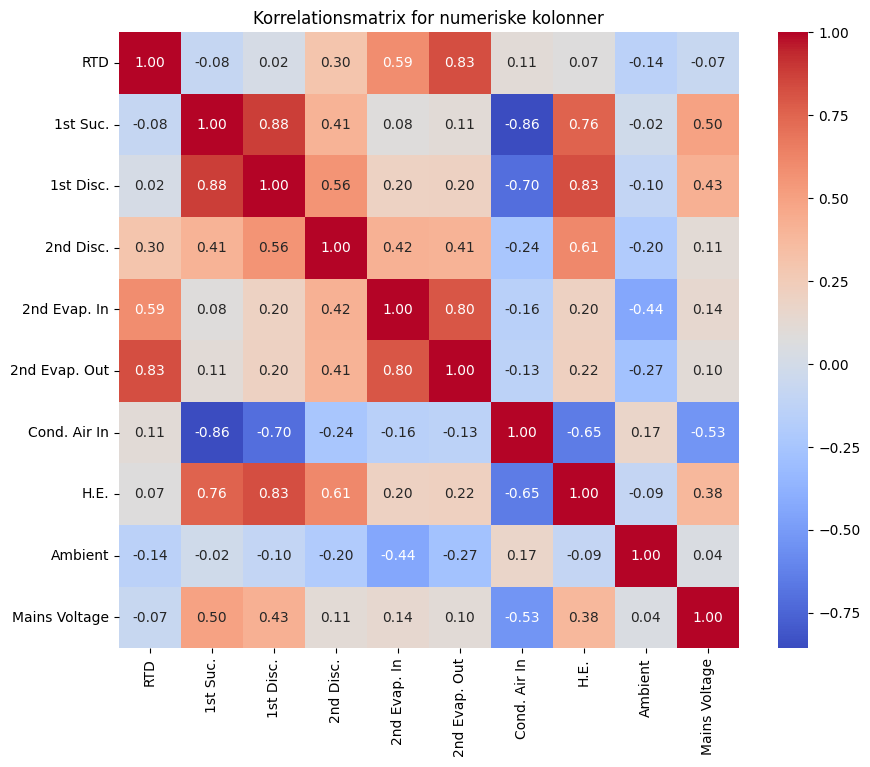

In [46]:
# Antag, at df er dit DataFrame
# Fjern de specifikke kolonner, der ikke er relevante
df_numeric = df.drop(columns=['Datetime', 'Event'], errors='ignore')

# Sørg for kun at inkludere numeriske data (float og int)
df_numeric = df_numeric.select_dtypes(include=['number'])

# Beregn korrelationsmatrix
correlation_matrix = df_numeric.corr()

# Plot korrelationsmatrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix for numeriske kolonner")
plt.show()


BOXPLOT / Varians analyse

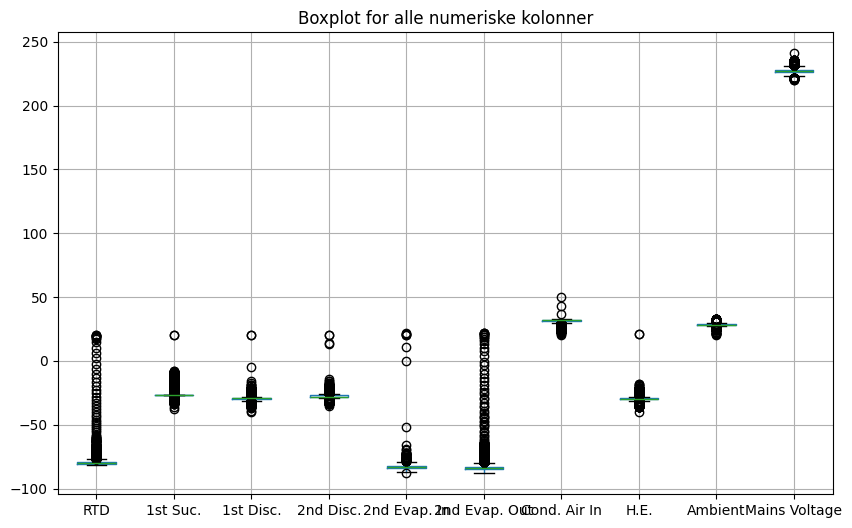

In [36]:
df.boxplot(figsize=(10, 6))
plt.title("Boxplot for alle numeriske kolonner")
plt.show()

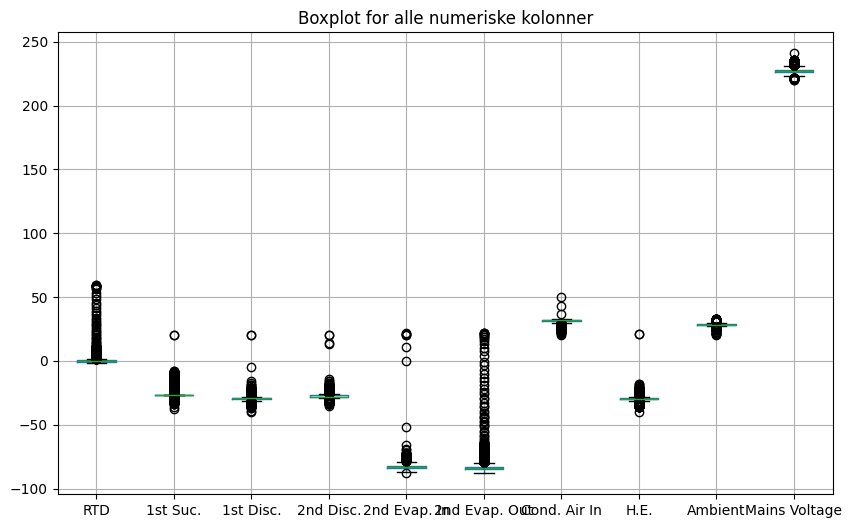

In [37]:
df_normalized.boxplot(figsize=(10, 6))
plt.title("Boxplot for alle numeriske kolonner")
plt.show()

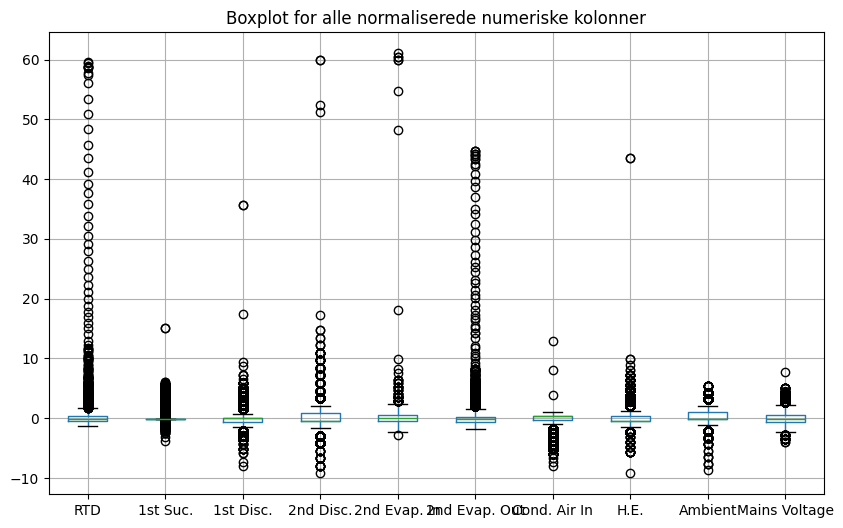

In [52]:
df_numeric = df.drop(columns=['Datetime', 'Event'], errors='ignore')

# Normaliser de numeriske kolonner
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_numeric)

# Lav en ny DataFrame for den normaliserede version
df_numeric_normalized = pd.DataFrame(normalized_data, columns=df_numeric.columns)

# Boxplot for at visualisere den normaliserede DataFrame
df_numeric_normalized.boxplot(figsize=(10, 6))
plt.title("Boxplot for alle normaliserede numeriske kolonner")
plt.show()

PCA

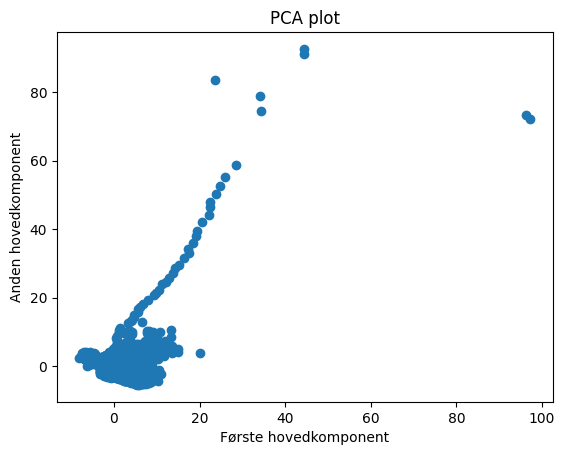

In [50]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[float, int]))

# Kør PCA (sæt n_components til 2 for at kunne plotte i 2D)
pca = PCA(n_components=len(scaled_data.T))
pca_data = pca.fit_transform(scaled_data)

# Plot PCA-resultatet
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("Første hovedkomponent")
plt.ylabel("Anden hovedkomponent")
plt.title("PCA plot")
plt.show()

Forklaret varians af hver komponent: [0.420041   0.25766702 0.09611471 0.09124202 0.05053929 0.02951332
 0.02152599 0.01807112 0.00940012 0.0058854 ]


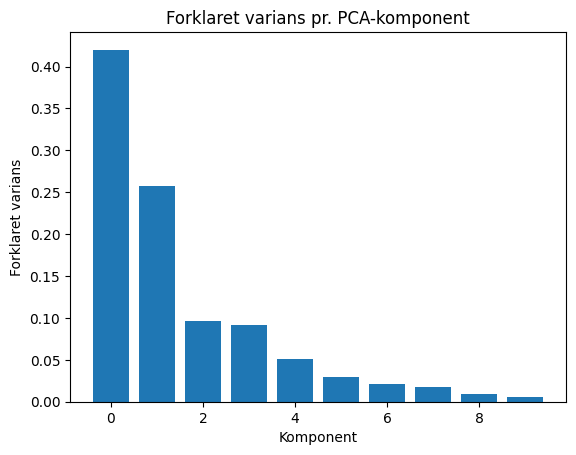

In [51]:
explained_variance = pca.explained_variance_ratio_
print("Forklaret varians af hver komponent:", explained_variance)

# Plot forklaret varians for hver komponent
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel("Komponent")
plt.ylabel("Forklaret varians")
plt.title("Forklaret varians pr. PCA-komponent")
plt.show()